In [37]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [25]:
quandl.ApiConfig.api_key = 'tZ-jk8gzf57RfxmBsYX6'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


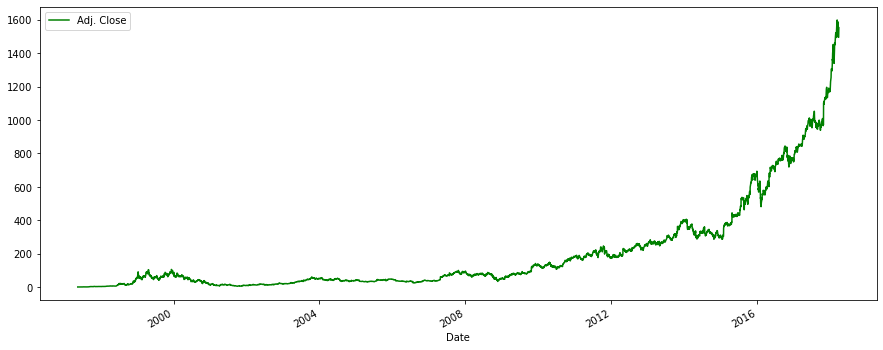

In [26]:
df['Adj. Close'].plot(figsize = (15,6), color = 'g')
plt.legend(loc='upper left')
plt.show()

In [31]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1501.37648213 1540.2521083  1551.64668839 1537.74125779 1558.65791927
 1574.15922943 1576.11684169 1592.33097806 1615.68401567 1605.07673618
 1605.57677844 1585.36230397 1592.59695799 1617.45012239 1632.37691591
 1640.20736497 1647.50585417 1676.26360391 1697.01003824 1686.14741801
 1689.14767159 1679.91284851 1668.59274281 1640.13289059 1684.37067209
 1679.42344544 1639.24983723 1587.60717455 1651.76153301 1589.19241492]


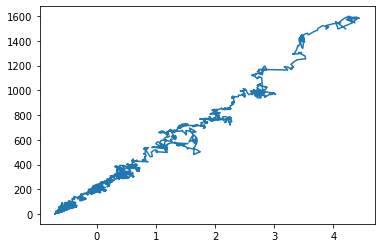

In [33]:
plt.plot(X,y)

(17282.0, 18029.5)

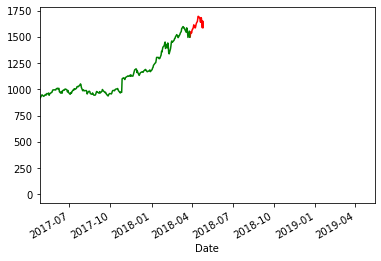

In [40]:
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")
plt.plot(dates, forecast_predicted, color = 'r')
df['Adj. Close'].plot(color = 'g')
plt.xlim(xmin = datetime.date(2017,4,26))

